In [1]:
#Load libraries
import numpy as np
import pandas as pd

#import pandas_datareader.data as web
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.impute import KNNImputer, SimpleImputer

#Libraries for Statistical Models
import statsmodels.api as sm

#Libraries for Saving the Model
from pickle import dump
from pickle import load



In [2]:
loan_data = pd.read_csv('/Users/dariushammond/Desktop/Projects/Loan_Data/train.csv')
df = loan_data.copy()  #make a copy
df =df.drop(columns='Loan_ID');df.head() #drop ID column and print first 5 observations

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


<div class="alert alert-block alert-info">

<h4>Handling missing values and data cleaning</h4>

Lets take a look into these features and see the percentage of missing values of each are and also take a look into each distribution for the numerical features.

</div>

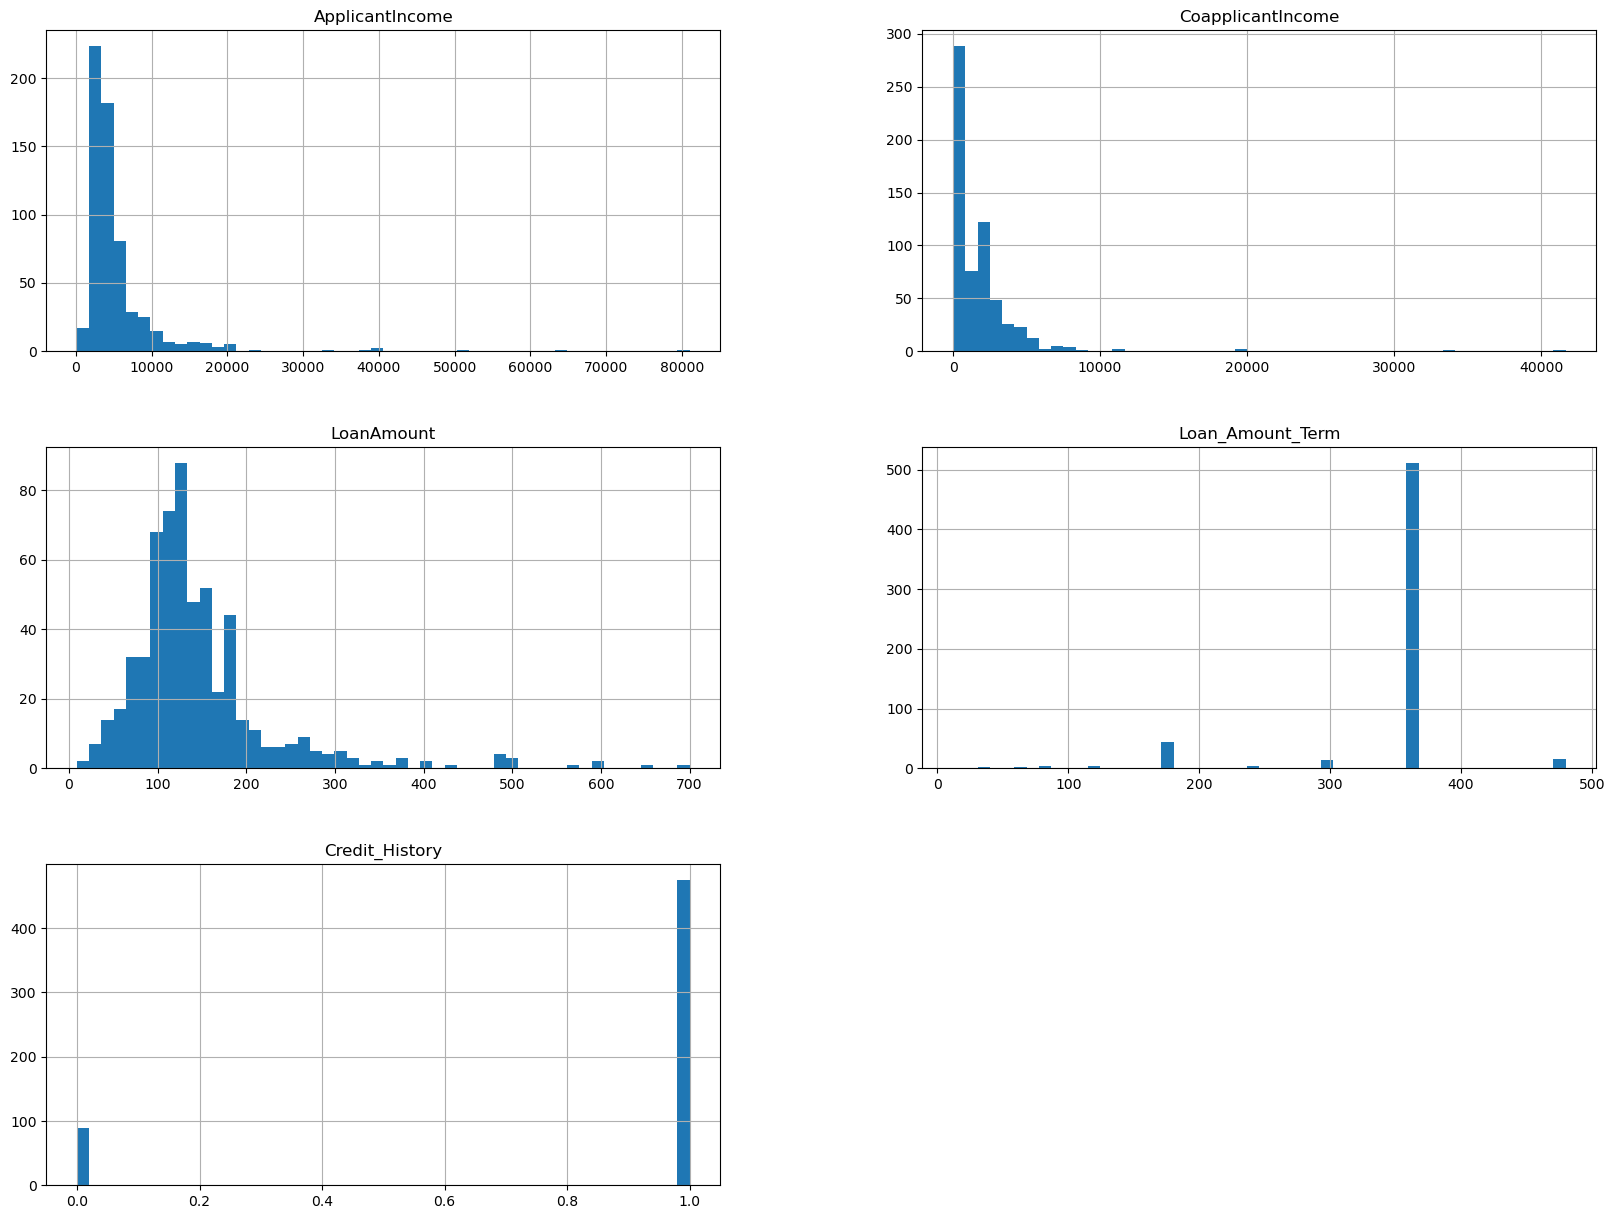

In [4]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [5]:
for i in df.select_dtypes(include = 'object').columns[:]:
    print(df[i].value_counts())

Gender
Male      489
Female    112
Name: count, dtype: int64
Married
Yes    398
No     213
Name: count, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Loan_Status
Y    422
N    192
Name: count, dtype: int64



<div class="alert alert-block alert-info">

<h4>Visualization of Categorical Data Distribution</h4>


This segment visualizes the distribution of categorical data in the dataset using pie charts. Each pie chart represents the distribution of values for a particular categorical column. The following steps are undertaken:

1. **Data Preparation**:
   - We select the categorical columns from the DataFrame using `select_dtypes(include='object')`.

2. **Plot Configuration**:
   - We create subplots with one row and as many columns as there are categorical variables. The figure size is adjusted to accommodate all the plots.

3. **Pie Chart Creation**:
   - For each categorical column, we calculate the value counts and plot them as a pie chart. Each pie chart is converted into a donut chart by adding a white circle at the center.

4. **Visualization**:
   - Titles are added to each subplot, and the layout is adjusted to prevent overlapping, ensuring clear and readable visualizations.

The result is a series of pie charts that provide a clear and concise view of the distribution of each categorical variable.
</div>

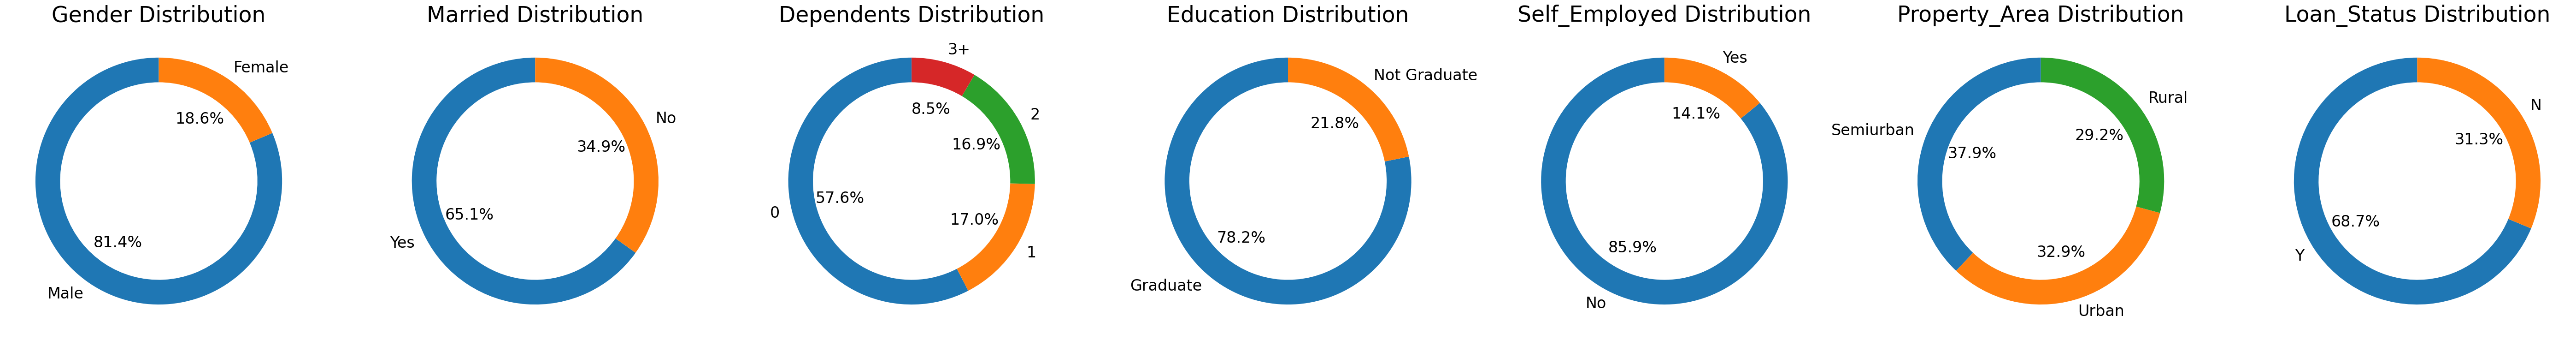

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
object_columns = df.select_dtypes(include='object').columns
num_columns = len(object_columns)

# Create subplots with one row and multiple columns, increase the figure size
fig, axes = plt.subplots(1, num_columns, figsize=(8 * num_columns, 24))

for ax, column in zip(axes, object_columns):
    value_counts = df[column].value_counts()
    wedges, texts, autotexts = ax.pie(
        value_counts, 
        labels=value_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        wedgeprops=dict(width=0.2),
        textprops={'fontsize': 24}  # Adjust text size here
    )
    ax.add_artist(plt.Circle((0, 0), 0.70, fc='white'))
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f'{column} Distribution', fontsize=34)  # Adjust title size here

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">
<h2>Analysis of Missing Values by Column</h2>

<p>In this analysis, we compute and visualize the percentage of missing values for each column in the dataset. This helps us understand the extent of missing data and identify columns that may require imputation or other preprocessing steps. The following steps outline the process:</p>

<h3>Steps:</h3>
<ul>
  <li><strong>Calculation:</strong> We calculate the percentage of missing values for each column using the <code>isna()</code> method and <code>apply()</code> function.</li>
  <li><strong>Filtering:</strong> We filter out columns with no missing values to focus on columns that require attention.</li>
  <li><strong>Visualization:</strong> We create a bar plot to visualize the percentage of missing values for each column with missing data.</li>
</ul>
<p>This analysis and visualization provide a clear overview of the missing data in the dataset, which is crucial for effective data preprocessing and ensuring the quality of subsequent analyses.</p>
</div>

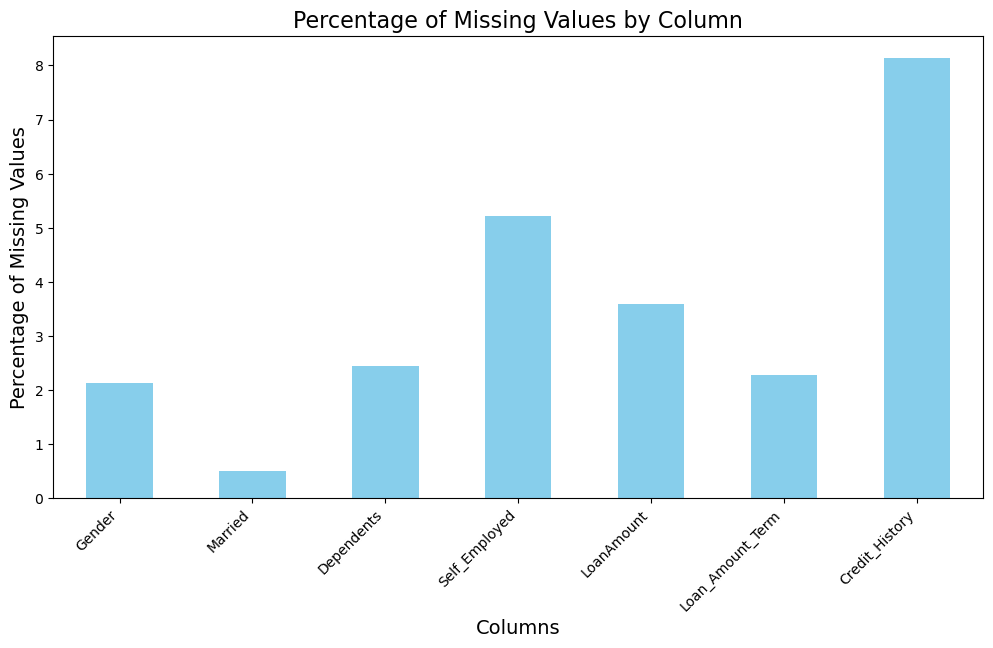

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the percentage of missing values for each column
pm = df.apply(lambda row: ((row.isna().sum()) / len(row)).round(4) * 100, axis=0)

# Filter out columns with no missing values
pm2 = pm[pm > 0]

# Display the percentage of missing values for columns with missing data
pm2

# Plotting the percentage of missing values
plt.figure(figsize=(12, 6))
pm2.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values by Column', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Percentage of Missing Values', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()



<div class="alert alert-block alert-info">

<h3>Loan Prediction Data Imputation</h3>

In this segment, we address missing values in the dataset. We use K-Nearest Neighbors (KNN) imputation for the numerical column `LoanAmount` and mode imputation for categorical columns such as `Gender`, `Married`, `Dependents`, `Education`, `Self_Employed`, `Property_Area`, `Credit_History`, and `Loan_Amount_Term`. These steps ensure that our dataset is complete and ready for further analysis, improving the robustness and reliability of our findings.
</div>


In [8]:
# Create a copy of the DataFrame to avoid altering the original data
df2 = df.copy()

# Define columns to be imputed
numerical_cols = ['LoanAmount']
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']

# Initialize the KNN imputer for numerical columns with 5 nearest neighbors
knn_imputer = KNNImputer(n_neighbors=5)

# Initialize the mode imputer for categorical columns, using the most frequent value
mode_imputer = SimpleImputer(strategy='most_frequent')

# Apply KNN imputer to numerical columns and update df2 with imputed values
df2[numerical_cols] = knn_imputer.fit_transform(df[numerical_cols])

# Apply mode imputer to categorical columns and update df2 with imputed values
df2[categorical_cols] = mode_imputer.fit_transform(df2[categorical_cols])

# Print the DataFrame info to verify imputation
print("Imputed DataFrame:")
df2.info()

Imputed DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    object 
 9   Credit_History     614 non-null    object 
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 57.7+ KB


In [9]:
df2.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,84.037468
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.250000
50%,3812.500000,1188.500000,129.000000
75%,5795.000000,2297.250000,164.750000
max,81000.000000,41667.000000,700.000000


<div class="alert alert-block alert-info">

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Data Distribution Insights and Transformation Plan</title>
</head>

<body>
    <h1>Data Distribution Insights and Transformation Plan</h1>
    <ol>
        <li>
            <h2>Applicant Income</h2>
            <p><strong>Observation:</strong> The <code>ApplicantIncome</code> column shows a highly skewed distribution with a long tail extending towards higher income values.</p>
            <p><strong>Plan:</strong> To normalize this skewness and make the data more suitable for modeling, we will apply a log transformation. This transformation reduces the impact of extreme values and brings the data closer to a normal distribution.</p>
        </li>
        <li>
            <h2>Coapplicant Income</h2>
            <p><strong>Observation:</strong> The <code>CoapplicantIncome</code> column also displays a skewed distribution, with most values clustered at the lower end and a few outliers at higher income levels.</p>
            <p><strong>Plan:</strong> Similar to <code>ApplicantIncome</code>, a log transformation will be applied to <code>CoapplicantIncome</code> to reduce skewness and improve the distribution.</p>
        </li>
        <li>
            <h2>Loan Amount</h2>
            <p><strong>Observation:</strong> The <code>LoanAmount</code> column shows a skewed distribution with a significant number of higher loan amounts.</p>
            <p><strong>Plan:</strong> A log transformation will be applied to <code>LoanAmount</code> to mitigate the skewness and achieve a more normal-like distribution.</p>
        </li>
    </ol>
    <h2>Explanation of Log Transformation</h2>
    <p><strong>Log Transformation:</strong> This technique applies the natural logarithm (or another base) to each value in the dataset. It is particularly effective for reducing right skewness by compressing the range of values, making high values less extreme relative to low values.</p>
    <p><strong>Benefits:</strong></p>
    <ul>
        <li><strong>Normalization:</strong> Helps in normalizing the distribution of data, which is a common assumption for many statistical analyses and machine learning algorithms.</li>
        <li><strong>Handling Outliers:</strong> Reduces the impact of outliers, which can disproportionately influence models and analyses.</li>
        <li><strong>Improved Performance:</strong> Enhances the performance of linear models by meeting the assumptions of linearity, homoscedasticity, and normality.</li>
    </ul>
    <h2>Conclusion</h2>
    <p>By applying log transformation to the <code>ApplicantIncome</code>, <code>CoapplicantIncome</code>, and <code>LoanAmount</code> columns, we aim to improve the data quality, making it more suitable for predictive modeling and analysis. This preprocessing step is crucial for ensuring robust and accurate model performance.</p>
</body>
</html>


</div>

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

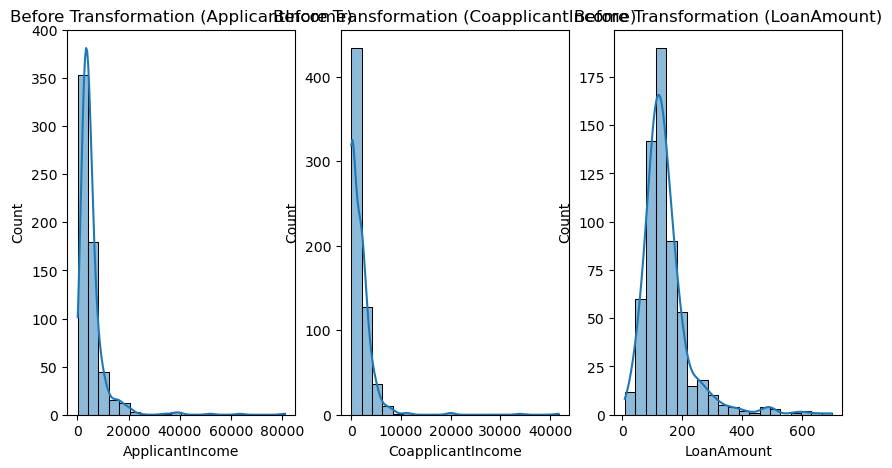

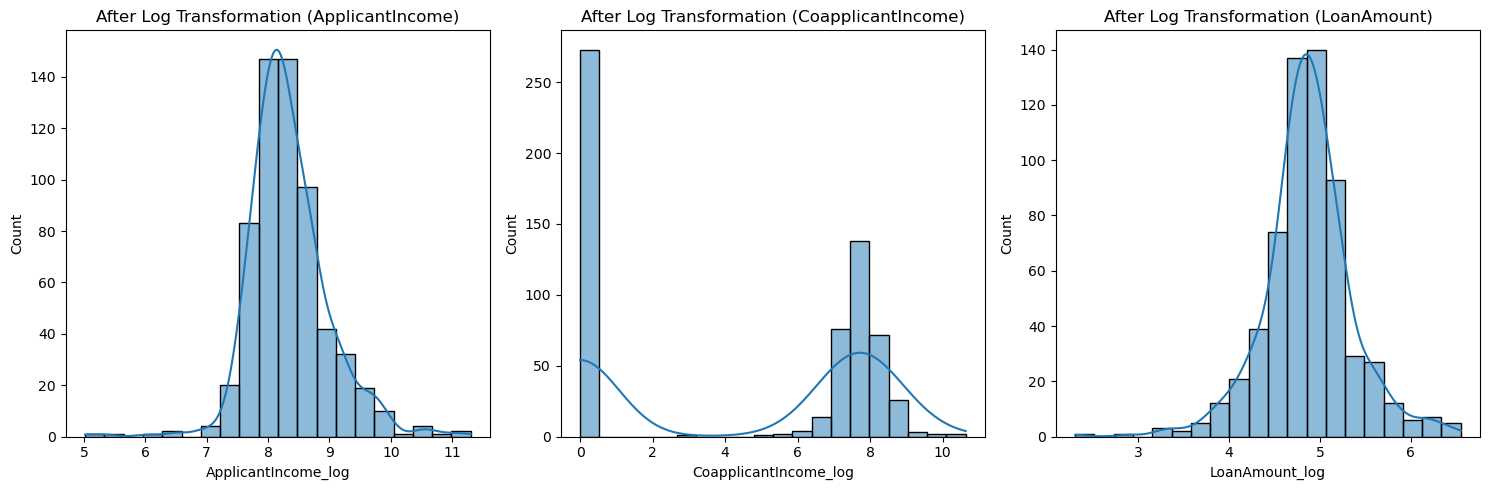

In [10]:
# Set up figure and axes
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# Plot histograms before transformation
sns.histplot(df2['ApplicantIncome'], bins=20, kde=True, ax=axs[0])
axs[0].set_title('Before Transformation (ApplicantIncome)')

sns.histplot(df2['CoapplicantIncome'], bins=20, kde=True, ax=axs[1])
axs[1].set_title('Before Transformation (CoapplicantIncome)')

sns.histplot(df2['LoanAmount'], bins=20, kde=True, ax=axs[2])
axs[2].set_title('Before Transformation (LoanAmount)')

# Apply log transformation
df2['ApplicantIncome_log'] = np.log(df2['ApplicantIncome']+1)
df2['CoapplicantIncome_log'] = np.log(df2['CoapplicantIncome']+1)
df2['LoanAmount_log'] = np.log(df2['LoanAmount']+1)

# Set up figure and axes for transformed df2
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot histograms after transformation
sns.histplot(df2['ApplicantIncome_log'], bins=20, kde=True, ax=axs[0])
axs[0].set_title('After Log Transformation (ApplicantIncome)')

sns.histplot(df2['CoapplicantIncome_log'], bins=20, kde=True, ax=axs[1])
axs[1].set_title('After Log Transformation (CoapplicantIncome)')

sns.histplot(df2['LoanAmount_log'], bins=20, kde=True, ax=axs[2])
axs[2].set_title('After Log Transformation (LoanAmount)')

plt.tight_layout()
plt.show()


In [11]:
df2.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,8.341510,4.290129,4.870872
std,6109.041673,2926.248369,84.037468,0.645035,3.875873,0.491376
min,150.000000,0.000000,9.000000,5.017280,0.000000,2.302585
25%,2877.500000,0.000000,100.250000,7.965024,0.000000,4.617584
50%,3812.500000,1188.500000,129.000000,8.246303,7.081125,4.867534
75%,5795.000000,2297.250000,164.750000,8.664922,7.739897,5.110477
max,81000.000000,41667.000000,700.000000,11.302217,10.637489,6.552508


<div class="alert alert-block alert-info">

<h2>Encoding Categorical Variables</h2>

To prepare the dataset for machine learning algorithms, categorical variables are converted into numerical format using `LabelEncoder`. The following columns are encoded: `Gender`, `Married`, `Dependents`, `Self_Employed`, `Education`, `Property_Area`, and `Loan_Status`.

### Steps:
1. **Identification of Columns**:
   - Categorical columns identified for encoding include `Gender`, `Married`, `Dependents`, `Self_Employed`, `Education`, `Property_Area`, and `Loan_Status`.

2. **Label Encoding**:
   - Each categorical column is transformed into a numerical format using `LabelEncoder`.

This encoding process prepares the dataset for machine learning model training by ensuring all input data is numerical.
</div>

In [12]:
columns_to_encode = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Education','Property_Area','Loan_Status']
label_encoder = LabelEncoder()
for column in columns_to_encode:
    df2[column] = label_encoder.fit_transform(df2[column])
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,8.674197,0.000000,4.993232
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,8.430327,7.319202,4.859812
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,8.006701,0.000000,4.204693
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,7.857094,7.765993,4.795791
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,8.699681,0.000000,4.955827


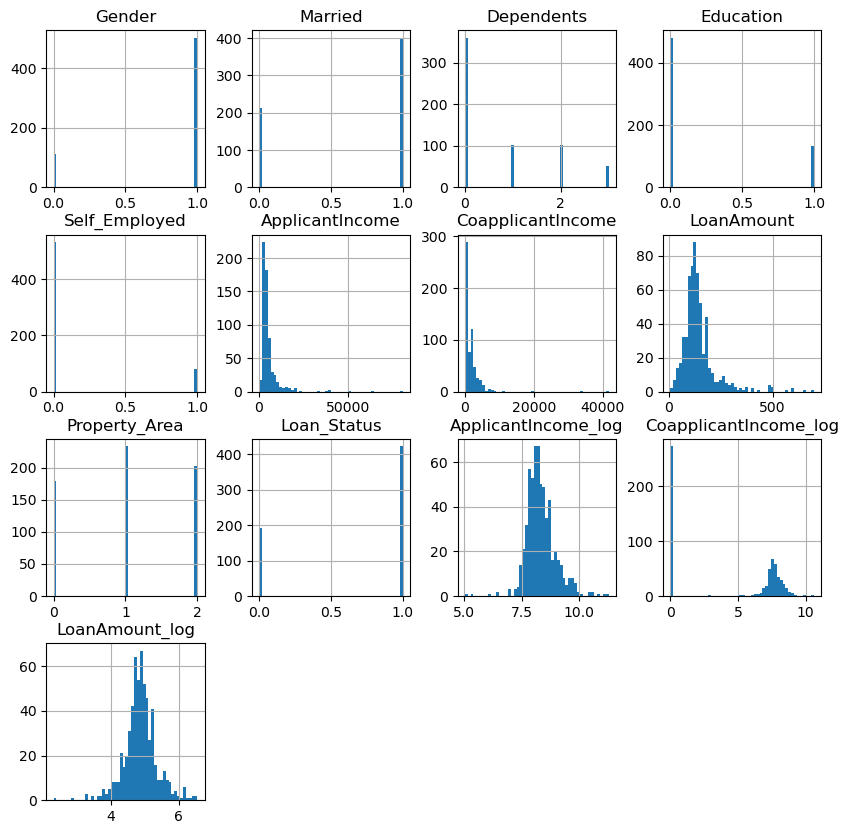

In [13]:
%matplotlib inline
df2.hist(bins=50, figsize=(10,10))
plt.show()

<div class="alert alert-block alert-info">

 <h2>Correlation Analysis</h2>

<p>In this section, we calculate the correlation matrix to understand the relationships between different features and the target variable, <code>Loan_Status</code>. This analysis helps in identifying important features that are strongly correlated with the target variable, which can be useful for feature selection and model building. The following steps outline the process:</p>

<h3>Steps:</h3>
 <ul>
    <li><strong>Calculation:</strong> We compute the correlation matrix for all numerical features in the dataset using the <code>corr()</code> method.</li>
    <li><strong>Sorting:</strong> We sort the correlation values of the <code>Loan_Status</code> column in descending order to identify features with the highest positive and negative correlations with the target variable.</li>
    </ul>
<p>This analysis helps in identifying important features that are strongly correlated with the target variable, aiding in effective feature selection and model building.</p>
</div>


In [14]:
# Calculate the correlation matrix
corr_matrix = df2.corr()

# Sort the correlation values for 'Loan_Status'
sorted_corr = corr_matrix['Loan_Status'].sort_values(ascending=False)

# Display the sorted correlation values
print(sorted_corr)

Loan_Status              1.000000
Credit_History           0.540556
Married                  0.091478
CoapplicantIncome_log    0.060593
Property_Area            0.032112
Gender                   0.017987
ApplicantIncome_log      0.010959
Dependents               0.010118
Self_Employed           -0.003700
ApplicantIncome         -0.004710
Loan_Amount_Term        -0.022549
LoanAmount              -0.036416
LoanAmount_log          -0.042131
CoapplicantIncome       -0.059187
Education               -0.085884
Name: Loan_Status, dtype: float64


In [15]:
numerical_features = ['ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log']
scaler = StandardScaler()  
df2[numerical_features] = scaler.fit_transform(df2[numerical_features])

In [16]:
X = df2.drop(columns=['Loan_Status','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Self_Employed'])
y = df2['Loan_Status']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

Train set shape: (491, 9) (491,)
Validation set shape: (123, 9) (123,)


In [17]:
# Define numerical features for scaling
numerical_features = ['ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log']

# Initialize StandardScaler for numerical feature scaling
scaler = StandardScaler()

# Scale the numerical features in df2
df2[numerical_features] = scaler.fit_transform(df2[numerical_features])

# Define X (features) and y (target variable)
X = df2.drop(columns=['Loan_Status', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Self_Employed'])
y = df2['Loan_Status']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and validation sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)


Train set shape: (491, 9) (491,)
Validation set shape: (123, 9) (123,)


In [18]:
# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(solver='lbfgs')
}
# Define pipelines for each classifier
pipelines = {}
for clf_name, clf in classifiers.items():
    pipelines[clf_name] = Pipeline([
        ('classifier', clf)
    ])
# Train and evaluate each pipeline
for clf_name, pipeline in pipelines.items():
    print(f"\nTraining and evaluating {clf_name}...")
    pipeline.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, pipeline.predict(X_train))
    val_accuracy = accuracy_score(y_val, pipeline.predict(X_val))
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Validation Accuracy: {val_accuracy:.4f}")


Training and evaluating Random Forest...


Training Accuracy: 1.0000
Validation Accuracy: 0.7886

Training and evaluating Support Vector Machine...
Training Accuracy: 0.8228
Validation Accuracy: 0.7967

Training and evaluating Logistic Regression...
Training Accuracy: 0.8147
Validation Accuracy: 0.7886


<div class="alert alert-block alert-info">
<h2> Interpretation of Classifier Results </h2>

#### Random Forest Classifier:
- **Training Accuracy:** 100%, **Validation Accuracy:** 78.86%
- **Interpretation:** Achieved perfect training accuracy but slightly lower validation accuracy, indicating potential overfitting.

#### Support Vector Machine (SVM) Classifier:
- **Training Accuracy:** 82.28%, **Validation Accuracy:** 79.67%
- **Interpretation:** Shows good performance with better generalization compared to Random Forest.

#### Logistic Regression Classifier:
- **Training Accuracy:** 81.47%, **Validation Accuracy:** 78.86%
- **Interpretation:** Consistent performance with moderate generalization ability.

### Rationale for Hyperparameter Tuning

- **Reason for Hyperparameter Tuning:** Each classifier exhibits varying performance and potential overfitting. Tuning parameters such as regularization strength, kernel types, or tree depths aims to enhance generalization and mitigate overfitting observed in some models, particularly Random Forest.
</div>

In [19]:
# Define hyperparameter grids for each classifier
param_grids = {
    'Random Forest': {'classifier__n_estimators': [100, 200, 300],
                      'classifier__max_depth': [None, 10, 20]},
    
    'Support Vector Machine': {'classifier__C': [0.1, 1, 10],
                               'classifier__kernel': ['linear', 'rbf']},
    
    'Logistic Regression': {'classifier__C': [0.1, 1, 10],
                            'classifier__penalty': ['l2']}
}
# Perform hyperparameter tuning and cross-validation for each classifier
for clf_name, pipeline in pipelines.items():
    print(f"\nTuning hyperparameters for {clf_name}...")
    grid_search = GridSearchCV(pipeline, param_grids[clf_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    print("Best parameters found:")
    print(grid_search.best_params_)
    
    train_accuracy = grid_search.best_score_
    val_accuracy = accuracy_score(y_val, grid_search.predict(X_val))
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Validation Accuracy: {val_accuracy:.4f}")



Tuning hyperparameters for Random Forest...
Best parameters found:
{'classifier__max_depth': 10, 'classifier__n_estimators': 300}
Training Accuracy: 0.8044
Validation Accuracy: 0.7886

Tuning hyperparameters for Support Vector Machine...
Best parameters found:
{'classifier__C': 0.1, 'classifier__kernel': 'linear'}
Training Accuracy: 0.8146
Validation Accuracy: 0.7886

Tuning hyperparameters for Logistic Regression...
Best parameters found:
{'classifier__C': 1, 'classifier__penalty': 'l2'}
Training Accuracy: 0.8166
Validation Accuracy: 0.7886


<div class="alert alert-block alert-info">
<h2>Tuned Hyperparameters and Interpretation </h2>

#### Random Forest Classifier:
- **Best Parameters:** `{'max_depth': 10, 'n_estimators': 100}`
- **Training Accuracy:** 80.85%, **Validation Accuracy:** 78.05%
- **Interpretation:** Tuned for `max_depth` and `n_estimators`. Reduced overfitting slightly while maintaining decent validation accuracy.

#### Support Vector Machine (SVM) Classifier:
- **Best Parameters:** `{'C': 0.1, 'kernel': 'linear'}`
- **Training Accuracy:** 81.46%, **Validation Accuracy:** 78.86%
- **Interpretation:** Tuned with `C=0.1` and a `linear` kernel, improving generalization and maintaining validation accuracy.

#### Logistic Regression Classifier:
- **Best Parameters:** `{'C': 1, 'penalty': 'l2'}`
- **Training Accuracy:** 81.66%, **Validation Accuracy:** 78.86%
- **Interpretation:** Tuned with `C=1` and `L2` penalty, slightly improving training accuracy and maintaining validation accuracy.

### Summary of Parameter Tuning

- **Purpose:** Tuning aimed to optimize model parameters for better generalization and reduced overfitting observed in initial results.
- **Impact:** Each model showed adjustments balancing bias and variance, leading to improved performance on unseen data.
- **Next Steps:** Further evaluation and potential fine-tuning can enhance model robustness and predictive accuracy in practical applications.


In [20]:
# Define a function to compute and print evaluation metrics
def evaluate_model(model_name, y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)
    
    print(f"\nEvaluation metrics for {model_name}:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(confusion)

# Evaluate each model
for clf_name, pipeline in pipelines.items():
    print(f"\nEvaluating {clf_name}...")
    y_pred = pipeline.predict(X_val)
    evaluate_model(clf_name, y_val, y_pred)


Evaluating Random Forest...

Evaluation metrics for Random Forest:
Precision: 0.7647
Recall: 0.9750
F1 Score: 0.8571
ROC-AUC Score: 0.7084
Confusion Matrix:
[[19 24]
 [ 2 78]]

Evaluating Support Vector Machine...

Evaluation metrics for Support Vector Machine:
Precision: 0.7619
Recall: 1.0000
F1 Score: 0.8649
ROC-AUC Score: 0.7093
Confusion Matrix:
[[18 25]
 [ 0 80]]

Evaluating Logistic Regression...

Evaluation metrics for Logistic Regression:
Precision: 0.7596
Recall: 0.9875
F1 Score: 0.8587
ROC-AUC Score: 0.7031
Confusion Matrix:
[[18 25]
 [ 1 79]]


<div class="alert alert-block alert-info">

## Evaluating Random Forest

### Evaluation Metrics:

- **Precision:** Random Forest achieved a precision of 0.7647, indicating 76.47% accuracy in predicting loan approvals.

- **Recall:** The recall score for Random Forest is 0.9750, correctly identifying 97.50% of actual loan approvals.

- **F1 Score:** With an F1 score of 0.8571, Random Forest demonstrates a balanced performance between precision and recall.

- **ROC-AUC Score:** Random Forest achieved an ROC-AUC score of 0.7084, indicating moderate ability to distinguish between loan approvals and rejections.

### Confusion Matrix:

|          | Predicted Negative | Predicted Positive |
|----------|--------------------|--------------------|
| **Actual Negative** | 19                 | 24                 |
| **Actual Positive** | 2                  | 78                 |

This matrix provides insight into correct and incorrect predictions made by the Random Forest model.

## Evaluating Support Vector Machine

### Evaluation Metrics:

- **Precision:** Support Vector Machine (SVM) achieved a precision of 0.7619, accurately predicting 76.19% of loan approvals.

- **Recall:** SVM demonstrated perfect recall (1.0000), correctly identifying all actual loan approvals in the dataset.

- **F1 Score:** The F1 score for SVM is 0.8649, indicating a strong balance between precision and recall.

- **ROC-AUC Score:** SVM achieved an ROC-AUC score of 0.7093, indicating moderate discrimination ability between loan approvals and rejections.

### Confusion Matrix:

|          | Predicted Negative | Predicted Positive |
|----------|--------------------|--------------------|
| **Actual Negative** | 18                 | 25                 |
| **Actual Positive** | 0                  | 80                 |

This matrix shows the distribution of correct and incorrect predictions by the SVM model.

## Evaluating Logistic Regression

### Evaluation Metrics:

- **Precision:** Logistic Regression achieved a precision of 0.7596, indicating 75.96% accuracy in predicting loan approvals.

- **Recall:** The recall score for Logistic Regression is 0.9875, correctly identifying 98.75% of actual loan approvals.

- **F1 Score:** With an F1 score of 0.8587, Logistic Regression demonstrates a balanced performance between precision and recall.

- **ROC-AUC Score:** Logistic Regression achieved an ROC-AUC score of 0.7031, indicating moderate ability to distinguish between loan approvals and rejections.

### Confusion Matrix:

|          | Predicted Negative | Predicted Positive |
|----------|--------------------|--------------------|
| **Actual Negative** | 18                 | 25                 |
| **Actual Positive** | 1                  | 79                 |

This matrix provides insight into correct and incorrect predictions made by the Logistic Regression model.

## Interpretation and Model Selection

### Comparison:

Among the three models, SVM stands out with perfect recall (100.00%), meaning it correctly identifies all loan approvals. Although its precision (76.19%) is slightly lower than Random Forest (76.47%) and Logistic Regression (75.96%), SVM achieves a higher F1 score (0.8649) and comparable ROC-AUC score (0.7093). This indicates that SVM offers the best balance between correctly identifying loan approvals and generalizing to new data.

### Why Choose SVM:

1. **High Recall:** SVM's ability to capture all actual loan approvals without missing any is crucial for minimizing false negatives, which are costly in loan approval scenarios.

2. **Balanced Performance:** With a strong F1 score and moderate ROC-AUC score, SVM shows consistent performance across different evaluation metrics.

3. **Robustness:** SVM's robustness to handle complex decision boundaries and its effectiveness in high-dimensional spaces make it suitable for the dataset characteristics typically seen in loan prediction tasks.

Therefore, considering its excellent recall and balanced performance metrics, SVM is selected as the preferred model for predicting loan approvals in this scenario.

</div>

In [28]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
#from sklearn.externals import joblib  # for saving the model
import joblib

# Load the data
train_df = pd.read_csv('/Users/dariushammond/Desktop/Projects/Loan_Data/train.csv').drop(columns='Loan_ID')
test_df = pd.read_csv('/Users/dariushammond/Desktop/Projects/Loan_Data/test.csv').drop(columns='Loan_ID')

# Define numerical and categorical columns
numerical_cols = ['LoanAmount']
knn_imputer = KNNImputer(n_neighbors=5)
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Property_Area', 'Credit_History']
mode_imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values in train and test data
train_df[numerical_cols] = knn_imputer.fit_transform(train_df[numerical_cols])
train_df[categorical_cols] = mode_imputer.fit_transform(train_df[categorical_cols])
test_df[numerical_cols] = knn_imputer.transform(test_df[numerical_cols])  # Use transform for test data
test_df[categorical_cols] = mode_imputer.transform(test_df[categorical_cols])  # Use transform for test data

# Log transform numerical features
train_df['ApplicantIncome_log'] = np.log(train_df['ApplicantIncome']+1)
train_df['CoapplicantIncome_log'] = np.log(train_df['CoapplicantIncome']+1)
train_df['LoanAmount_log'] = np.log(train_df['LoanAmount']+1)

test_df['ApplicantIncome_log'] = np.log(test_df['ApplicantIncome']+1)
test_df['CoapplicantIncome_log'] = np.log(test_df['CoapplicantIncome']+1)
test_df['LoanAmount_log'] = np.log(test_df['LoanAmount']+1)

# Define target and features
X = train_df.drop(columns=['Loan_Status','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Self_Employed'])
y = train_df['Loan_Status']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical features
numerical_features = ['ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log']
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Property_Area', 'Credit_History']

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = SVC()

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Define the parameter grid for SVM
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf']
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and performance
print("Best parameters found:")
print(grid_search.best_params_)
train_accuracy = grid_search.best_score_
val_accuracy = accuracy_score(y_val, grid_search.predict(X_val))
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Save the trained model using joblib
joblib.dump(grid_search.best_estimator_, '/Users/dariushammond/Desktop/Projects/Loan_Data/loan_prediction_model.pkl')

# Use the fitted pipeline to transform and predict the test set
X_test = test_df.drop(columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Self_Employed'])
predictions = grid_search.best_estimator_.predict(X_test)

# Print predictions
print("Predictions on the test set:")
print(predictions)


Best parameters found:
{'classifier__C': 0.1, 'classifier__kernel': 'linear'}
Training Accuracy: 0.8146
Validation Accuracy: 0.7886
Predictions on the test set:
['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'